In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rohan venkata sai\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_locations="C:\\Users\\rohan venkata sai\\Desktop\\Data Science & AI\\Data files\\Visadataset.csv"
visa_df=pd.read_csv(file_locations)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


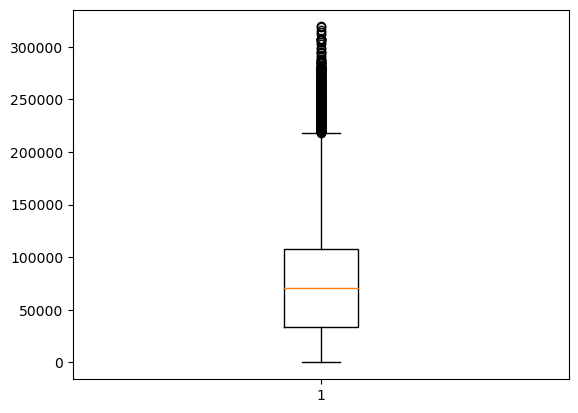

In [3]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

# orange line: Median value

**Procedure to find the outliers**

$Step-1$:
   - Calculate Q1 Q2 and Q3
   
$Step-2$:
   - Calculate IQR=(Q3-Q1)
   
$Step-3$:
   - Calculate UB=Q3+1.5*IQR
   - Calculate LB=Q1-1.5*IQR
    
$Step-4$:
   - Find the outliers which are having greater then UB
   - Find the outliers which are having less than LB

In [4]:
q1=np.quantile(visa_df['prevailing_wage'],0.25)
q2=np.quantile(visa_df['prevailing_wage'],0.50)
q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=(q3-q1)
UB=q3+1.5*IQR
LB=q1-1.5*IQR
UB,LB
# >UB <LB are the outliers
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
# if you apply & with out outlier
# if you apply | with outlier
outliers_df=visa_df[con1|con2]

In [5]:
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [6]:
def outliers(col):
    q1=np.quantile(visa_df[col],0.25)
    q2=np.quantile(visa_df[col],0.50)
    q3=np.quantile(visa_df[col],0.75)
    IQR=(q3-q1)
    UB=q3+1.5*IQR
    LB=q1-1.5*IQR
    con1=visa_df[col]>UB
    con2=visa_df[col]<LB
    outliers_df=visa_df[con1|con2]
    print(f'{col} has {len(outliers_df)} outliers')
    
num_col=visa_df.select_dtypes(exclude='object').columns
for col in num_col:
    outliers(col)

no_of_employees has 1556 outliers
yr_of_estab has 3260 outliers
prevailing_wage has 427 outliers


In [7]:
q1=np.quantile(visa_df['prevailing_wage'],0.25)
q2=np.quantile(visa_df['prevailing_wage'],0.50)
q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=(q3-q1)
UB=q3+1.5*IQR
LB=q1-1.5*IQR
############ Outliers df ##########
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
outliers_df=visa_df[con1|con2]
outliers_df
############ Non outliers df ##########
con11=visa_df['prevailing_wage']<UB
con22=visa_df['prevailing_wage']>LB
non_outliers_df=visa_df[con11&con22]



In [8]:
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


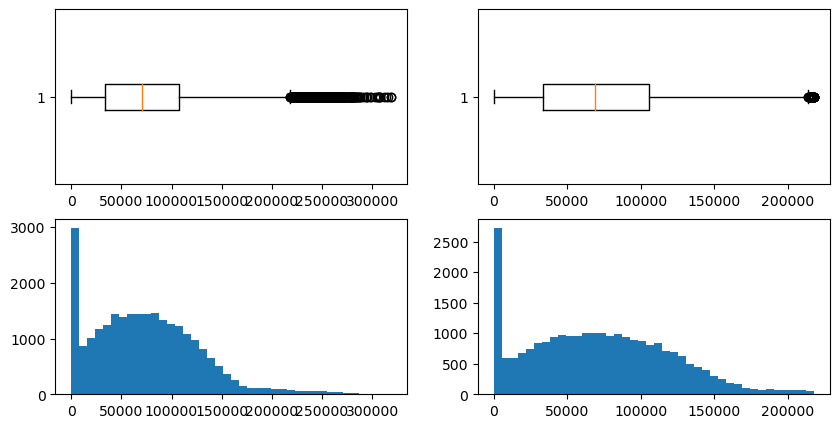

In [9]:
# will compare
# Total data vs Non outliers data
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.boxplot(visa_df['prevailing_wage'],vert=False) # 25480
plt.subplot(2,2,2)
plt.boxplot(non_outliers_df['prevailing_wage'],vert=False) #25053
plt.subplot(2,2,3)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)

plt.show()

**How to deal outliers**
- Drop the outliers based some percentage
   - if you have very huge data
    
    - and the outliers percentage is <2, then drop the outliers
 
    - Drop the outliers means, we are removing some rows all the columns
 
    - In the above examples total count=25480,outliers are=427, 427*100/25480=1.6
    
    - After removing 427 observations, we have 25053 observation (98% of data)

- Impute (Fill) the outliers with Median value
    - We already know that outliers doesnt affect Median value
    
    - so if you want loss the data, and you want fill the outliers then use Median

- Impute (Fill) with UB and LB values
    - Fill the outliers with UB value, which are having >UB
    
    - Fill the outliers with LB value, which are having <LB

### **Using Median Imputation and Concatenate DataFrames**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
file_locations="C:\\Users\\rohan venkata sai\\Desktop\\Data Science & AI\\Data files\\Visadataset.csv"
visa_df=pd.read_csv(file_locations)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [12]:
# To deal the outliers
# Drop: Not recommended >2%
# Median value: Outliers doesnot affect Median

# Two types of dataframes are there
# outliers_data and non_outliers_data
q1=np.quantile(visa_df['prevailing_wage'],0.25)
q2=np.quantile(visa_df['prevailing_wage'],0.50)
q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=(q3-q1)
UB=q3+1.5*IQR
LB=q1-1.5*IQR
############ Outliers df ##########
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
outliers_df=visa_df[con1|con2]
outliers_df
############ Non outliers df ##########
con11=visa_df['prevailing_wage']<UB
con22=visa_df['prevailing_wage']>LB
non_outliers_df=visa_df[con11&con22]



In [13]:
len(non_outliers_df),len(outliers_df)

(25053, 427)

In [21]:
visa_df[['prevailing_wage']].median()

prevailing_wage    70308.21
dtype: float64

In [22]:
# <median value> of original data frame(visa_df)
############# Impute with median value ##############
outliers_df['prevailing_wage']=visa_df['prevailing_wage'].median()
modified_data=outliers_df
modified_data.head()

C:\Users\rohan venkata sai\AppData\Local\Temp\ipykernel_8760\57590739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['prevailing_wage']=visa_df['prevailing_wage'].median()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,70308.21,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,70308.21,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,70308.21,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,70308.21,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,70308.21,Year,Y,Certified


In [26]:
# now we have non_outliers_df and modified_data
# we need to merge,combine,concatenate
# outer join = A U B
# inner join = A Intersection B
################## Merge two data frames #######################

pd.merge(non_outliers_df,modified_data,how="outer")
final_df = pd.concat([non_outliers_df,modified_data])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e1d49b24d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1d49b1dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1d400af10>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1d49a0590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1d48c19d0>],
 'means': []}

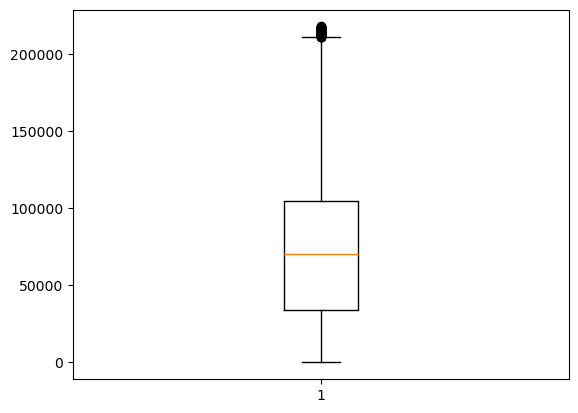

In [27]:
plt.boxplot(final_df['prevailing_wage'])

### **np.where**

- np.where is used to fill the values based on True condition

- np.where will take 3 arguments
    - Condition
    - Value you want to replace, If the condition is true
    - Value you want to replace, If the conditon is false

**np.where(condition, true value, false value)**

In [32]:
d1=pd.DataFrame()
d1['Name']=['Ramesh','Suresh','Sathish']
d1['Age']=[24,30,32]

# In the Age column >25 I want to replace 300
con=d1['Age']>25

# Where ever true:300
# where ever false: keep as it is
d1['Age']=np.where(con,300,d1['Age'])
d1

,Name,Age
0,Ramesh,24
1,Suresh,300
2,Sathish,300


{'whiskers': [<matplotlib.lines.Line2D at 0x1e1d4838a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e1d4777610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e1d483ac10>],
 'medians': [<matplotlib.lines.Line2D at 0x1e1d47d2950>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e1d4931510>],
 'means': []}

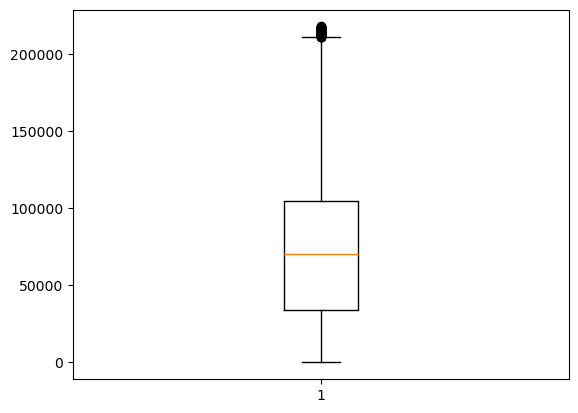

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_locations="C:\\Users\\rohan venkata sai\\Desktop\\Data Science & AI\\Data files\\Visadataset.csv"
visa_df=pd.read_csv(file_locations)
visa_df.head()

q1=np.quantile(visa_df['prevailing_wage'],0.25)
q2=np.quantile(visa_df['prevailing_wage'],0.50)
q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=(q3-q1)
UB=q3+1.5*IQR
LB=q1-1.5*IQR
############ Outliers df ##########
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
con = con1 | con2
med=visa_df['prevailing_wage'].median()
visa_df['prevailing_wage'] = np.where(con,med,visa_df['prevailing_wage'])
plt.boxplot(visa_df['prevailing_wage'])